In [1]:

import warnings
warnings.filterwarnings('ignore')


In [17]:
# Import important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
pd.set_option("max_columns", None)
pd.set_option("max_rows", 200)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
from utils import *

In [5]:
SEED = 8

In [10]:
INPUT_FILE = "concrete_wd_features.csv"
INPUT_DIR = "./"

In [11]:
df = read_input(INPUT_DIR, INPUT_FILE)

In [12]:
df.shape

(1030, 18)

In [13]:
TARGET='strength'

In [20]:
del df['b']

In [21]:
# Separating dependent and independent variables
X = df.drop(TARGET,axis=1)
Y = df[TARGET]

In [22]:
features = X.columns.tolist()

In [23]:
rf = pickle.load(open("concrete_model_v01.pk","rb"))

In [25]:
p_target = 'strength_p'

In [26]:
df['p_target'] = rf.predict(X)

In [27]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,r_water_cement,r_coarseagg_fineagg,r_slag_cement,p_ash_water,agg_flag,slag_flag,ash_flag,superplastic_flag,p_target
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3.332205,29.89,1.440198,1.298330,1.500354,0.00,True,True,False,False,29.314580
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,2.639057,23.51,0.937241,1.357448,0.249852,19676.69,True,True,True,True,24.881248
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,3.332205,29.22,0.749600,1.111124,0.000000,17934.18,True,False,True,True,28.810874
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,3.332205,45.85,0.857143,1.391045,0.428571,0.00,True,True,False,False,42.744043
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,3.332205,18.29,1.248708,1.503373,1.184755,0.00,True,True,False,True,19.404398


In [29]:
df['error'] = np.abs((df['p_target'].values - df[TARGET].values)/df[TARGET].values)

<AxesSubplot:xlabel='strength', ylabel='p_target'>

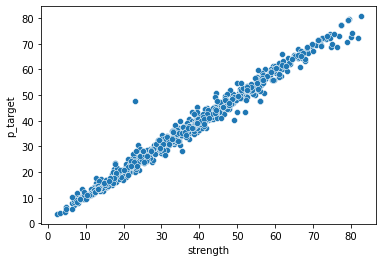

In [30]:
sns.scatterplot(x=TARGET,
           y = 'p_target',
           data=df)

In [31]:
df['bucket'] = pd.qcut(df[TARGET],
                      q=10,
                      duplicates='drop')

In [33]:
df.groupby(by='bucket')[['p_target',TARGET,'error']].agg(target_mean = (TARGET,'mean'),
                                                   predicted_mean = ('p_target','mean'),
                                                      error = ('error','mean'))

,target_mean,predicted_mean,error
bucket,,,
"(2.329, 14.2]",10.524615,11.375025,0.110863
"(14.2, 20.96]",17.275686,17.604435,0.058888
"(20.96, 25.474]",23.432621,24.482656,0.064031
"(25.474, 30.928]",28.069223,28.468519,0.040768
"(30.928, 34.445]",32.718835,33.078013,0.030310
"(34.445, 39.02]",36.926117,36.894062,0.029061
"(39.02, 43.289]",40.810777,40.433299,0.028989
"(43.289, 50.514]",46.312913,45.773223,0.034882
"(50.514, 58.82]",54.185437,53.345281,0.028139


In [34]:
df['bucket'] = pd.qcut(df['p_target'],
                      q=10,
                      duplicates='drop')
df.groupby(by='bucket')[['p_target',TARGET,'error']].agg(target_mean = (TARGET,'mean'),
                                                   predicted_mean = ('p_target','mean'),
                                                      error = ('error','mean'))

,target_mean,predicted_mean,error
bucket,,,
"(3.688, 14.395]",10.583495,11.202915,0.102419
"(14.395, 21.123]",17.329029,17.553682,0.062469
"(21.123, 26.012]",23.576893,24.035533,0.046688
"(26.012, 31.065]",28.023107,28.664892,0.053220
"(31.065, 34.948]",32.785340,33.044611,0.028179
"(34.948, 38.486]",37.063592,36.890777,0.032511
"(38.486, 42.619]",40.963301,40.572305,0.027599
"(42.619, 49.538]",46.083495,45.809394,0.049519
"(49.538, 58.184]",53.941650,53.451372,0.025278


In [56]:

_df = df[df[TARGET]<=40]
mean_squared_error(_df[TARGET],_df[p_target])


12.678232669400174

In [57]:
_df = df[df[TARGET]>40]
mean_squared_error(_df[TARGET],_df[p_target])

18.410385522484248

In [58]:
mean_squared_error(df[TARGET],df[p_target])

14.787442311457323

In [59]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()
lr.fit(df[[p_target]],df[TARGET])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
mean_squared_error(df[TARGET], lr.predict(df[[p_target]]))

14.097620968249766

### Using DT to see the area of problem

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
dt = DecisionTreeRegressor(max_depth=3)
y = df['error']
X = df[['cement','water']]

In [38]:
dt.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [39]:
from sklearn import tree

$100
$200[]

10 customers


1 customer: 50$
    
    
2/10 [20% precision]

4/10 [40% precision]

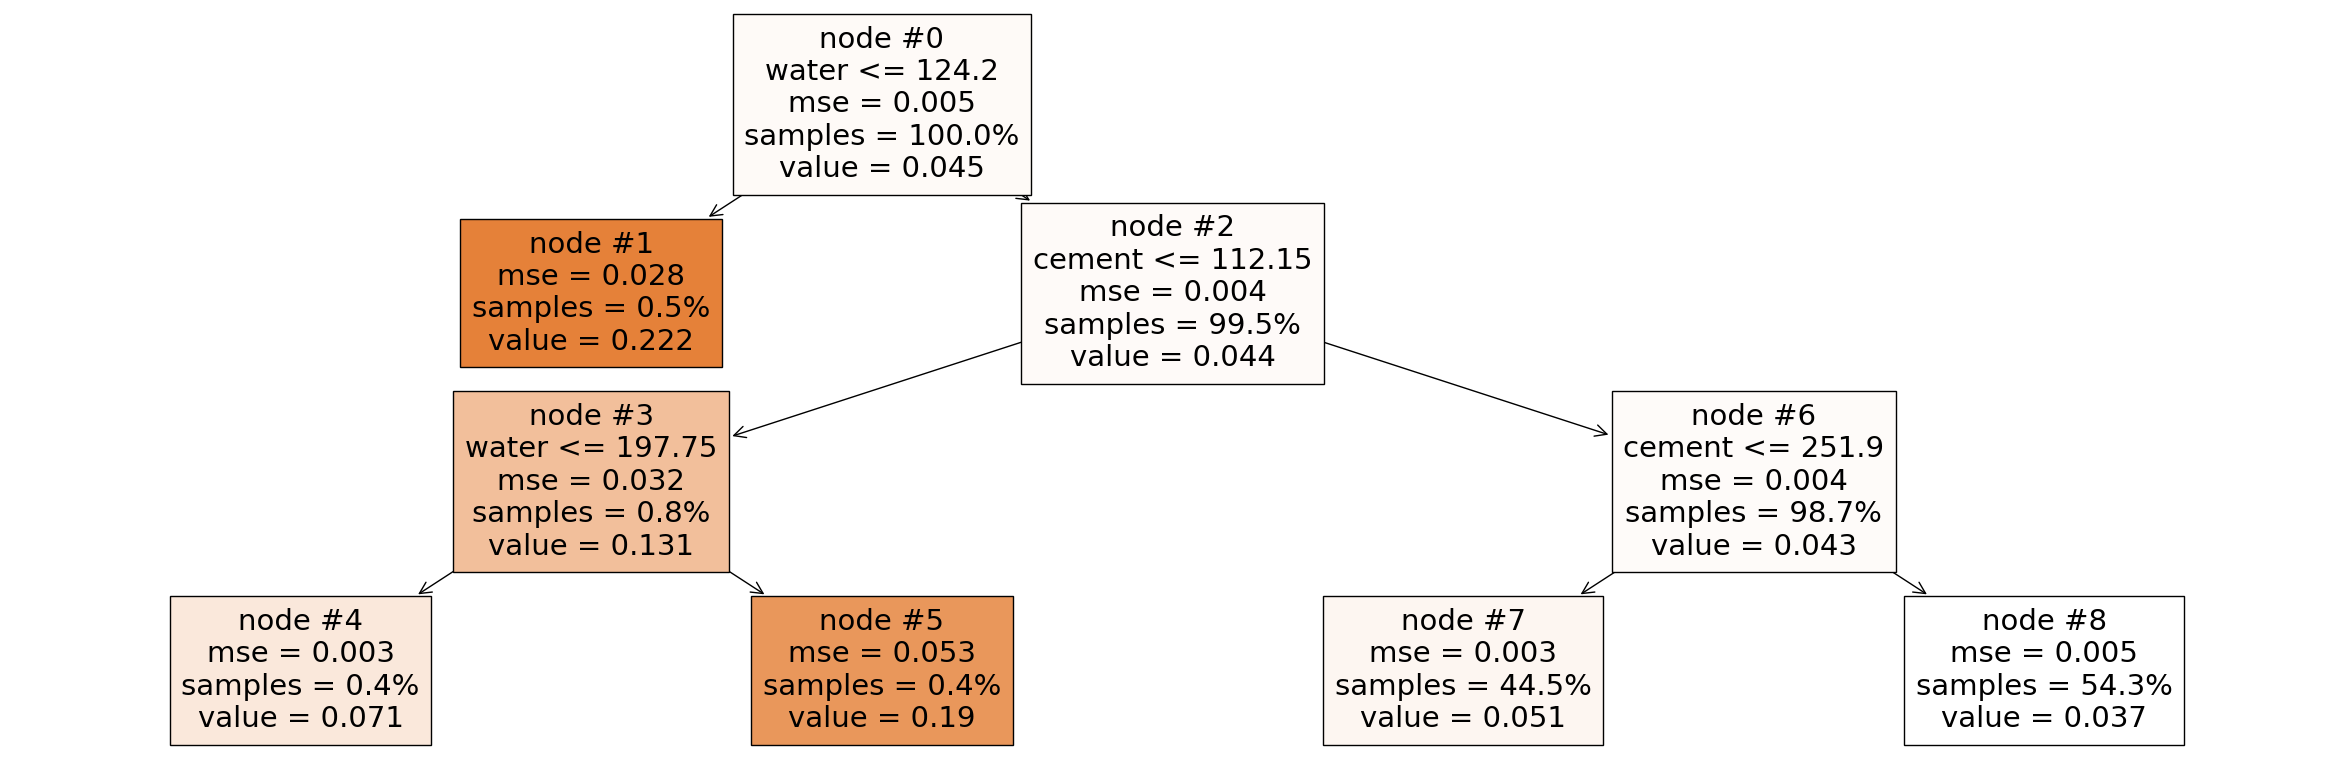

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (30,10), dpi=100)
tree.plot_tree(dt,
               feature_names = X.columns, 
               filled=True,
               node_ids=True,
               proportion=True
              )